In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'/mnt/34C5A6637A7942E0/Nextcloud/Sites_Internet/quarto_PNSI/16_tris':
  os.chdir(r'/mnt/34C5A6637A7942E0/Nextcloud/Sites_Internet/quarto_PNSI/16_tris')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


{"/usr/lib/python3.11/importlib/_bootstrap.py": 1686297595.0, "/usr/lib/python3.11/importlib/_bootstrap_external.py": 1686297595.0, "/usr/lib/python3.11/zipimport.py": 1686297595.0, "/usr/lib/python3.11/codecs.py": 1686297595.0, "/usr/lib/python3.11/encodings/aliases.py": 1686297595.0, "/usr/lib/python3.11/encodings/__init__.py": 1686297595.0, "/usr/lib/python3.11/encodings/utf_8.py": 1686297595.0, "/usr/lib/python3.11/abc.py": 1686297595.0, "/usr/lib/python3.11/io.py": 1686297595.0, "/usr/lib/python3.11/stat.py": 1686297595.0, "/usr/lib/python3.11/_collections_abc.py": 1686297595.0, "/usr/lib/python3.11/genericpath.py": 1686297595.0, "/usr/lib/python3.11/posixpath.py": 1686297595.0, "/usr/lib/python3.11/os.py": 1686297595.0, "/usr/lib/python3.11/_sitebuiltins.py": 1686297595.0, "/usr/lib/python3.11/types.py": 1686297595.0, "/usr/lib/python3.11/warnings.py": 1686297595.0, "/usr/lib/python3.11/importlib/__init__.py": 1686297595.0, "/usr/lib/python3.11/importlib/_abc.py": 1686297595.0, "

/tmp/ipykernel_33992/3844009729.py:20: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


In [2]:
def tri_insertion(tableau: list) -> list:
    """Tri en place par insertion le tableau passé en paramètre."""
    for i in range(1, len(tableau)): # <1>
        j = i # <2>
        while j > 0 and tableau[j] < tableau[j-1]: # <3>
            tableau[j], tableau[j-1] = tableau[j-1], tableau[j] # <4>
            j -= 1 # <5>
    return tableau

In [3]:
tri_insertion([5, 2, 4, 6, 1, 3])

[1, 2, 3, 4, 5, 6]

In [4]:
def tri_selection(tableau: list) -> list:
    """Trie en place par sélection le tableau passé en paramètre."""
    for i in range(len(tableau)): # <1>
        min = i # <2>
        for j in range(i+1, len(tableau)): # <3>
            if tableau[j] < tableau[min]: # <4>
                min = j
        tableau[i], tableau[min] = tableau[min], tableau[i] # <5>
    return tableau

In [5]:
tri_selection([5, 2, 4, 6, 1, 3])

[1, 2, 3, 4, 5, 6]

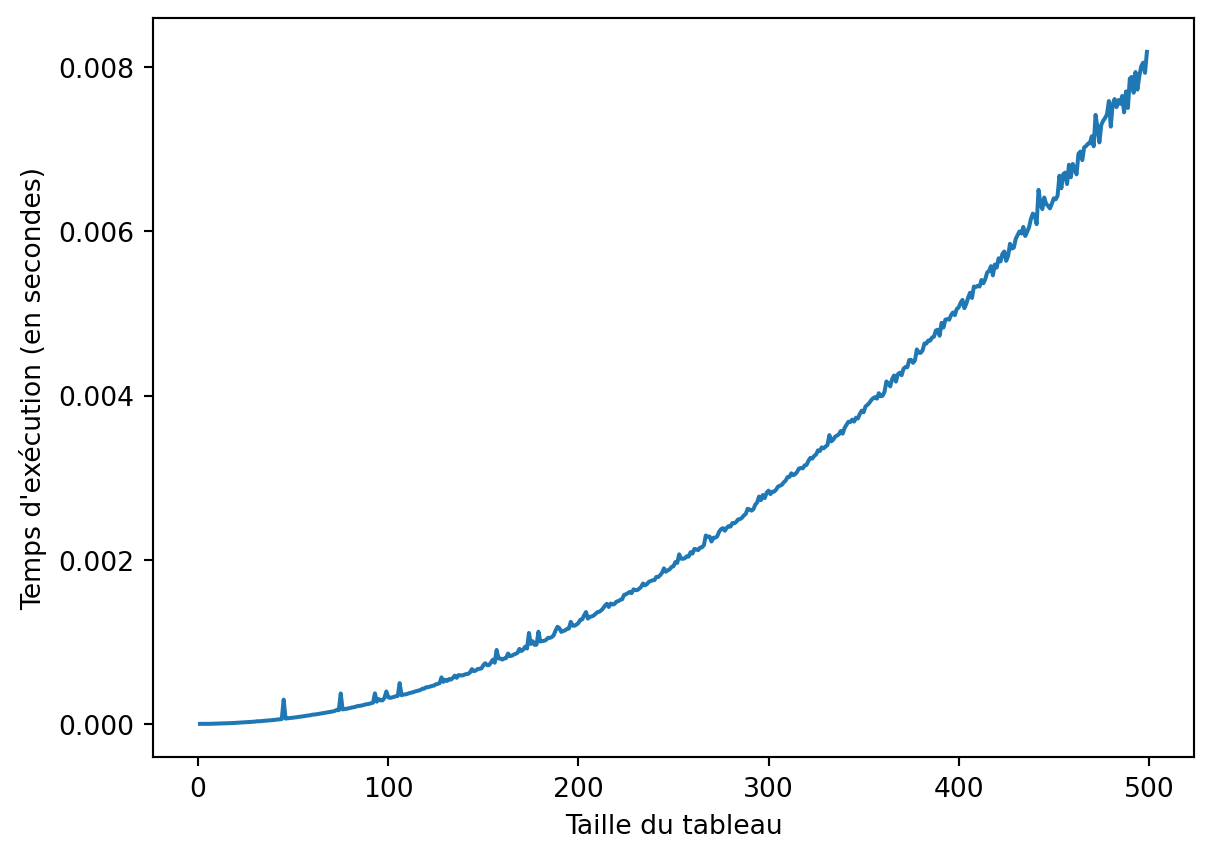

In [6]:
import timeit
import matplotlib.pyplot as plt

tailles = [i for i in range(1, 500)]
temps = []
# on applique le tri dans le pire des cas : tableau trié dans l'ordre décroissant
for n in tailles:
    temps.append(timeit.timeit(
        "tri_insertion([n-k for k in range(n)])",
        globals=globals(),
        number=1
    ))
plt.plot(tailles, temps)
plt.xlabel("Taille du tableau")
plt.ylabel("Temps d'exécution (en secondes)")
plt.show()

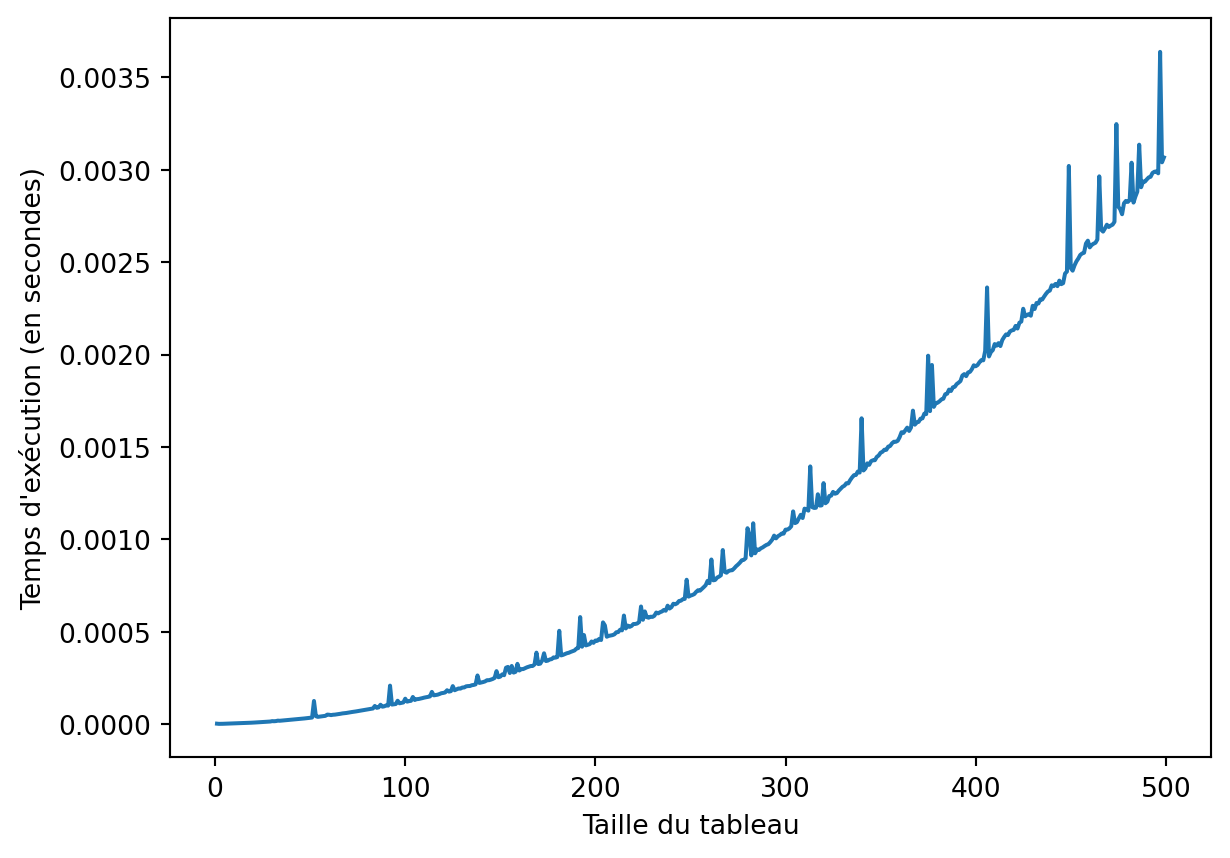

In [7]:
import timeit
import matplotlib.pyplot as plt

tailles = [i for i in range(1, 500)]
temps = []
# on applique le tri dans le pire des cas : tableau trié dans l'ordre décroissant
for n in tailles:
    temps.append(timeit.timeit(
        "tri_selection([n-k for k in range(n)])",
        globals=globals(),
        number=1
    ))
plt.plot(tailles, temps)
plt.xlabel("Taille du tableau")
plt.ylabel("Temps d'exécution (en secondes)")
plt.show()